### Reading the dataset

In [1]:
import numpy as np
import pandas as pd


datatrain1=pd.read_csv('Batch1e.csv')
datatrain2=pd.read_csv('Batch2e.csv')
datatrain3=pd.read_csv('Batch3e.csv')
datatrain4=pd.read_csv('Batch4e.csv')
datatrain5=pd.read_csv('Batch5e.csv')
datatrain6=pd.read_csv('Batch6e.csv')
datatrain7=pd.read_csv('Batch7e.csv')
datatrain8=pd.read_csv('Batch8e.csv')
datatrain9=pd.read_csv('Batch9e.csv')
datatrain10=pd.read_csv('Batch10e.csv')

### Change dataframe to array

In [2]:
X1=np.array(datatrain1)
X2=np.array(datatrain2)
X3=np.array(datatrain3)
X4=np.array(datatrain4)
X5=np.array(datatrain5)
X6=np.array(datatrain6)
X7=np.array(datatrain7)
X8=np.array(datatrain8)
X9=np.array(datatrain9)
X10=np.array(datatrain10)

array_list=[X1,X2,X3,X4,X5,X6,X7,X8,X9,X10]
sample = np.concatenate([X1, X2])
lengths = [len(X1), len(X2)]
datatrain_array=np.vstack(array_list)

### Split x and y (feature and target)

In [3]:
from sklearn.preprocessing import MinMaxScaler

xtrain = datatrain_array[:,1:130]
ytrain = datatrain_array[:,0]

min_max_scaler = MinMaxScaler()
xtrain = min_max_scaler.fit_transform(xtrain) 

### Train and test split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xtrain, ytrain, test_size=.1,random_state=1)

### Multinomial Naive Bayes

In [5]:
#training and testing the model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

clf = MultinomialNB()
gauss=clf.fit(X_train,y_train)

y_pred =gauss.predict(X_test)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('ground truth           :',y_test)
print('predicted class        :',y_pred)
print('cross validation acc   :',cross_val_score(gauss,X_test,y_test).mean())

ground truth           : [ 3.  3.  5. ...,  4.  5.  2.]
predicted class        : [ 3.  6.  5. ...,  4.  5.  2.]
ground truth           : [ 3.  3.  5. ...,  4.  5.  2.]
predicted class        : [ 3.  6.  5. ...,  4.  5.  2.]
cross validation acc   : 0.606449757785


### Confusion matrix

Confusion matrix, without normalization
[[150   3   0  35  39  29]
 [  2 225  10  11   0  51]
 [  1  23  87   4   1  52]
 [ 42   0   0  65  21  66]
 [  0   0   0  28 195  93]
 [  2   0   0  41   5 109]]
Normalized confusion matrix
[[ 0.59  0.01  0.    0.14  0.15  0.11]
 [ 0.01  0.75  0.03  0.04  0.    0.17]
 [ 0.01  0.14  0.52  0.02  0.01  0.31]
 [ 0.22  0.    0.    0.34  0.11  0.34]
 [ 0.    0.    0.    0.09  0.62  0.29]
 [ 0.01  0.    0.    0.26  0.03  0.69]]


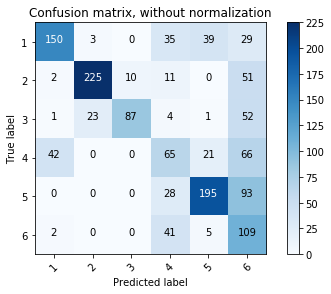

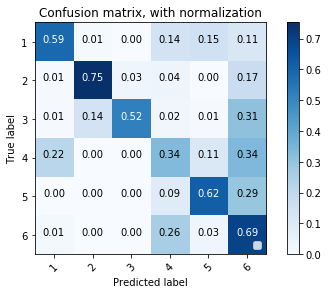

In [6]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names=['1','2','3','4','5','6']
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
rootdir = 'F:/OneDrive/Research & Study/Thesis Writing/svm_all2.png'
plt.savefig(rootdir,figsize=(4,3),dpi=500,bbox_inches='tight',labelsize=12)

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Confusion matrix, with normalization')
plt.legend(['train', 'test'], loc='lower right')
rootdir = 'F:/OneDrive/Research & Study/Thesis Writing/svm_all1.png'
plt.savefig(rootdir,figsize=(4,3),dpi=500,bbox_inches='tight',labelsize=11)
plt.show()